In [12]:
import numpy as np
import pandas as pd
import scipy.stats
import scipy.special

In [2]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"C:\Users\ndzad\Dropbox\MINI\Magisterka\data.csv",encoding='latin1',sep=";",header=0)

In [13]:
data.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [3]:
data[data['Insured Damages (\'000 US$)'].isna()==0]

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1990-0361-AUT,1990,361,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,NaN,28200.0,58483.0,NaN,NaN,"48,21879729",NaN,NaN,NaN,NaN
1,1990-0376-AUT,1990,376,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,NaN,37700.0,78185.0,NaN,NaN,"48,21879729",NaN,NaN,NaN,NaN
3,1990-0722-AUT,1990,722,NaN,Natural,Meteorological,Storm,NaN,NaN,Vivian,...,NaN,80000.0,165910.0,120000.0,248866.0,"48,21879729",NaN,NaN,NaN,NaN
4,1990-0723-AUT,1990,723,NaN,Natural,Meteorological,Storm,NaN,NaN,Wiebke,...,NaN,80000.0,165910.0,120000.0,248866.0,"48,21879729",NaN,NaN,NaN,NaN
5,1990-0717-BEL,1990,717,NaN,Natural,Meteorological,Storm,NaN,NaN,Daria,...,NaN,250000.0,518470.0,350000.0,725858.0,"48,21879729",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,2021-0096-USA,2021,96,NaN,Natural,Meteorological,Storm,Convective storm,Winter storm/Blizzard,NaN,...,NaN,15000000.0,15000000.0,30000000.0,30000000.0,100,1,3217;3219;3227;3231;3232;3238;3239;3241;3247;3...,NaN,"Arkansas, Colorado, Illinois, Kentucky, Louisi..."
2449,2021-0551-USA,2021,551,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical storm 'Ida',...,NaN,36000000.0,36000000.0,65000000.0,65000000.0,100,1,3220;3221;3232;3234;3244;3246;3252;3260,NaN,"Connecticut, Delaware, Louisiana, Maryland, Ne..."
2463,2021-0797-USA,2021,797,NaN,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,...,NaN,4000000.0,4000000.0,5200000.0,5200000.0,100,1;2,3236;3263,28805;28836;28845;29329;29687;29712;29724;2975...,"Michigan, Wisconsin (Adm1). Caldwell, Craighea..."
2509,2022-0157-USA,2022,157,NaN,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,...,NaN,2300000.0,NaN,3000000.0,NaN,NaN,1;2,3247;3249;3250;3254,28694;28701;28743;28748;28751;30079;30082;3009...,"North Carolina, Ohio, Oklahoma, South Carolina..."


Funkcja generuje trajektorie procesu Poissona do momentu t_max metodą przerzedzania. https://onlinelibrary.wiley.com/doi/10.1002/nav.3800260304

In [13]:
def NHPP(t_max, params):
    """
    Funkcja generuje trajektorię niejednorodnego procesu Poissona.
    t_max - maksymalny moment czasu.
    params
    """
    N = 0.0
    t = 0
    df = pd.DataFrame({'t':t,'N':N},index=[0])
    while True:
        N = (N ** params[1] + scipy.stats.expon.rvs(loc=params[0])) ** (1/params[1])
        t += 1
        df = df.append({'t':t,'N':N},ignore_index=True)
        if N > t_max:
            return(df)
            break

In [14]:
n=NHPP(10000000,[0.5,0.35])

In [15]:
def HPP(t_max, lambd):
    """
    Funkcja generuje trajektorię jednorodnego procesu Poissona.
    t_max - maksymalny moment czasu.
    lambda - parametr lambda procesu Poissona.
    """
    N = 0
    t = 0
    df = pd.DataFrame({'t':t,'N':N},index=[0])
    while True:
        T = scipy.stats.expon.rvs(loc=lambd)
        t += T
        N += 1
        df = df.append({'t':t,'N':N},ignore_index=True)
        if t > t_max:
            return(df)
            break

In [16]:
HPP(10,2)

,t,N
0,0.000000,0.0
1,3.422407,1.0
2,6.815460,2.0
3,10.514075,3.0


In [19]:
def HPP2(t_max, lambd):
    """
    Funkcja generuje trajektorię jednorodnego procesu Poissona metodą sortowania rozkładu jednostajnego.
    t_max - maksymalny moment czasu.
    lambda - parametr lambda procesu Poissona.
    """
    N = scipy.stats.poisson.rvs(lambd*t_max)
    U = np.sort(scipy.stats.uniform.rvs(size=N))
    S = t_max*U
    return(S)


In [20]:
HPP2(10,2)

array([1.369477  , 2.70610703, 2.8207501 , 3.17113743, 3.29310887,
       3.44100332, 4.04291899, 4.95437049, 5.26064888, 5.69406254,
       5.75085935, 5.9095489 , 6.03994663, 6.58279705, 6.9060903 ,
       7.53741247, 8.14160593, 8.37009387, 9.53128711, 9.71632873])

(array([88., 25., 15., 10., 16., 10., 11.,  4.,  8.,  6.]),
 array([       0.        ,  1001722.82718592,  2003445.65437185,
         3005168.48155777,  4006891.30874369,  5008614.13592961,
         6010336.96311554,  7012059.79030146,  8013782.61748738,
         9015505.4446733 , 10017228.27185923]),
 <BarContainer object of 10 artists>)

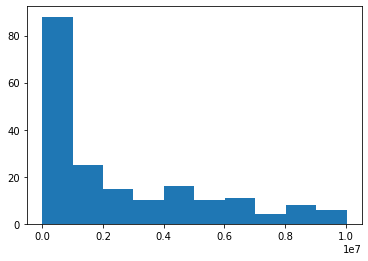

In [54]:
fig, ax = plt.subplots(1, 1)
ax.hist(n['N'])

In [17]:
def first_negative(lst):
    res = [i for i,x in enumerate(lst) if x<0]
    return None if res == [] else res[0]

In [21]:
def ruin(u, theta, t_max, lambd, distribution, params):
    N = HPP(t_max,lambd)
    if distribution == "lognorm":
        C = lambd*(np.exp(params[0]+params[1]**2/2))*(1+theta)
        X = scipy.stats.lognorm.rvs(params[1],size=int(max(N['N'])),loc=params[0])
    elif distribution == "exponential":
        C = lambd*(1/params[0])*(1+theta)
        X = scipy.stats.expon.rvs(size=int(max(N['N'])),scale=1/params[0])
    elif distribution == "gamma":
        C = lambd*(params[0]/params[1])*(1+theta)
        X = scipy.stats.gamma.rvs(size=int(max(N['N'])),shpape=params[0],scale=1/params[1])   
    elif distribution == "weibull":
        C = lambd*(params[0]*scipy.special.gamma(1+1/params[1]))*(1+theta)
        X = scipy.stats.weibull_max.rvs(size=int(max(N['N'])),loc=params[0],scale=params[1])
    # elif distribution == "burr":
    #     C = lambd*(np.exp(params[0]+params[1]^2/2))*(1+theta)
    #     X = scipy.stats.lognorm.rvs(size=int(max(N['N'])),loc=params[0],scale=params[1])   
    C_t = np.array(C*N['N'])
    S = np.insert(np.cumsum(X),0,0.0)
    R_temp = u + C - S
    ruin_time = first_negative(R_temp)
    if ruin_time != None:
        R = R_temp[0:ruin_time+1]
    else:
        R = R_temp
    return([R,ruin_time])


In [26]:
ruin(100,0.2,100,2,"lognorm",[0,1])

[array([103.95693105, 102.45627315, 102.2944711 , 101.65269086,
        100.44389959,  98.80271709,  97.31269319,  86.84673267,
         85.38406094,  85.28785017,  85.07936507,  84.1199284 ,
         83.09182813,  82.65067388,  79.54431972,  77.27374359,
         75.84953222,  75.33976263,  74.62156069,  70.6161093 ,
         69.8525049 ,  69.41231354,  68.94289362,  61.61566097,
         61.49757349,  60.23157301,  47.20668976,  46.79206543,
         44.80742406,  42.4635341 ,  42.10190914,  40.3675295 ,
         39.29074491,  38.46022574,  38.22794447,  37.80085857]),
 None]

In [49]:
def ruin_simulations(n, u, theta, t_max, lambd, distribution, params):
    S = 0
    for i in range(n):
        if ruin(u, theta, t_max, lambd, distribution, params)[1] != None:
            S += 1
    return(S/n)

In [80]:
p = np.empty(0)
p =np.insert(p,0,1)
p

array([1.])

In [88]:
p = np.empty(0)
for n in range(50,5000,50):
    p = np.insert(p,len(p),ruin_simulations(n,10,0.2,10,1,"lognorm",[0,1]))

Text(0, 0.5, 'Prawdopodobieństwo ruiny')

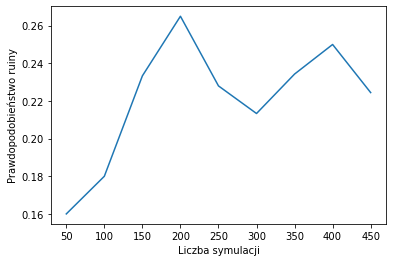

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(50,500,50),p)
plt.xlabel("Liczba symulacji")
plt.ylabel("Prawdopodobieństwo ruiny")